**Project Name:** Credit Scoring Prediction Model

**Project Goal:** Classify borrowers as high-risk or low-risk for loan approval and predict the likelihood of loan default

**Data Source:** [Kaggle](https://https://www.kaggle.com/datasets/laotse/credit-risk-dataset)

In [278]:
# @title Import libraries

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [279]:
# @title File Management

# Check present working directory
%pwd

'/content/drive/MyDrive/PAU'

In [280]:
# Change the directory to drive
%cd /content/drive/MyDrive/PAU

/content/drive/MyDrive/PAU


In [281]:
# Unzip the dataset that was downloaded from kaggle
# !unzip archive\ \(1\).zip

In [282]:
# Read csv file
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [283]:
#Get all the unique values under loan_grade

df['loan_grade'].value_counts()


,count
loan_grade,
A,10777
B,10451
C,6458
D,3626
E,964
F,241
G,64


In [284]:
print(f'The dataset shape:', df.shape)

The dataset shape: (32581, 12)


<ipython-input-285-6fd32ce3b668>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='person_age', y='loan_intent', inner='box', palette='Dark2')


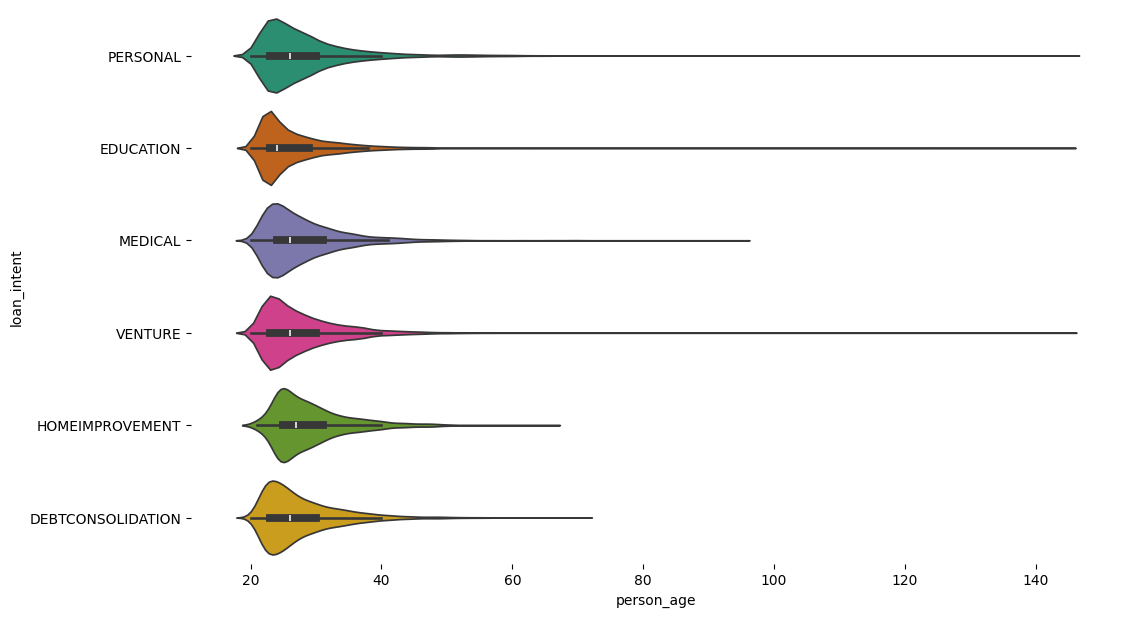

In [285]:
# @title Data Visualisation

# loan_intent vs person_age

figsize = (12, 1.2 * len(df['loan_intent'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='person_age', y='loan_intent', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

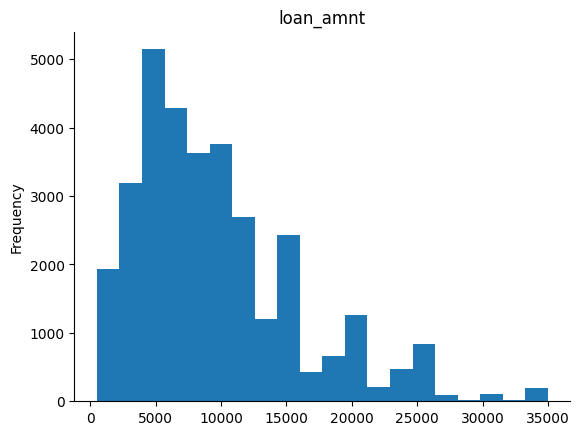

In [286]:
df['loan_amnt'].plot(kind='hist', bins=20, title='loan_amnt')
plt.gca().spines[['top', 'right',]].set_visible(False)

This reveals outliers in the age. Based on this insight, outliers will be handled.

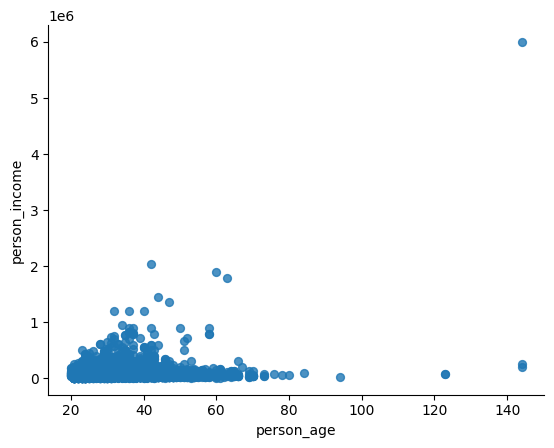

In [287]:
# person_age vs person_income

df.plot(kind='scatter', x='person_age', y='person_income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [288]:
# @title Data Cleaning and Pre-processing

# fix the outliers in the person_age column. Set 100 as the max age
df.loc[df['person_age'] > 100, 'person_age'] = 100

In [289]:
# Check for null values
df.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


This shows that two features have missing values: `person_emp_length` and `loan_int_rate`. A further analysis into their mean and median values, will provide insight on how to handle these null values.

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [291]:
df[["person_emp_length", "loan_int_rate"]].describe()

,person_emp_length,loan_int_rate
count,31686.000000,29465.000000
mean,4.789686,11.011695
std,4.142630,3.240459
min,0.000000,5.420000
25%,2.000000,7.900000
50%,4.000000,10.990000
75%,7.000000,13.470000
max,123.000000,23.220000


Since the difference between the mean and median for each feature is small, we can fill the missing values using the mean.

In [292]:
# Handle missing values in both features.

df['person_emp_length'].fillna(df['person_emp_length'].mean(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace=True)

<ipython-input-292-050ef171eb40>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(df['person_emp_length'].mean(), inplace=True)
<ipython-input-292-050ef171eb40>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

The statistical information on `person_emp_length` also shows that there are people with 0 employment length, signifying unemployment.

To further analyse this demography, we investigate the loan intent to identify the type of loans these customers are interested in.

In addition, we also look at their income distribution.

number of unemployed customers:  4105


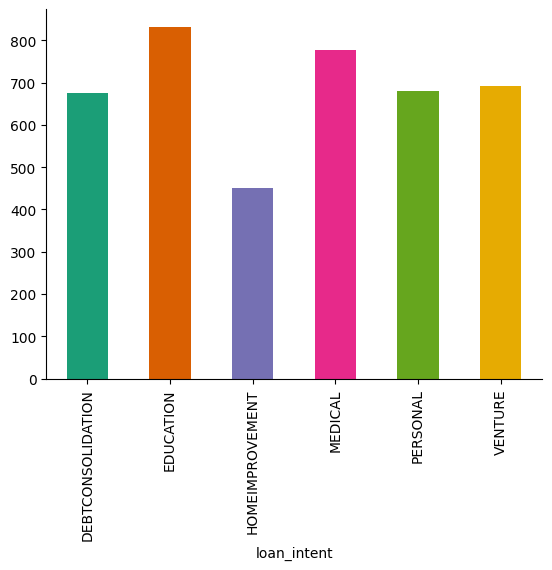

In [293]:
# loan_intent vs person_emp_length

unemployed = df[df["person_emp_length"]==0]
print("number of unemployed customers: ", len(unemployed))

unemployed.groupby('loan_intent').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

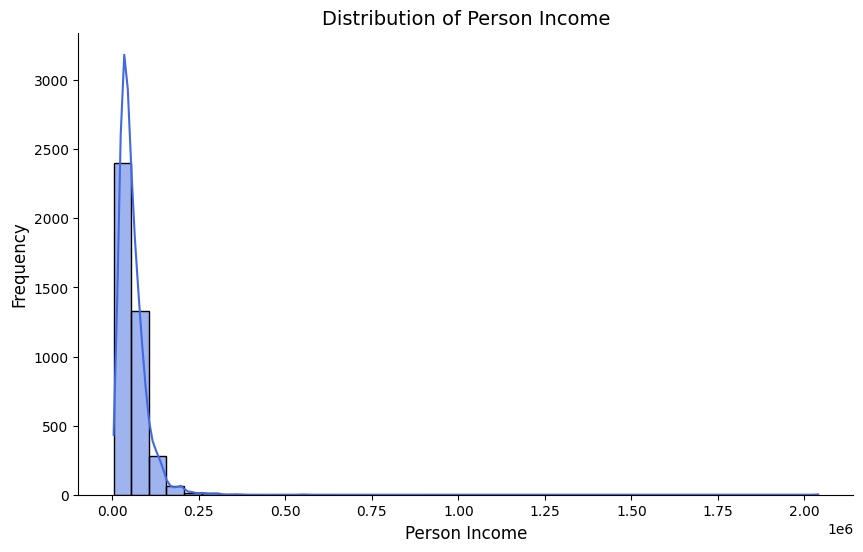

In [294]:
plt.figure(figsize=(10, 6))
sns.histplot(unemployed['person_income'], bins=40, kde=True, color='royalblue')
plt.title('Distribution of Person Income', fontsize=14)
plt.xlabel('Person Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


This shows that unemployment does not equate no income in this data. However, their income group is low.

In [295]:
# @title Data Transformation

# label encode the categorical columns
categorical_cols_to_encode = ['person_home_ownership', 'loan_intent', 'loan_grade', 'loan_status', 'cb_person_default_on_file']
label_mappings = {}  # Dictionary to store mappings

for col in categorical_cols_to_encode:
    le = LabelEncoder()  # Create a new instance for each column
    df[col] = le.fit_transform(df[col])
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))  # Store mappings

# Print the correct mappings
for col, mapping in label_mappings.items():
    print(f"Encoding for '{col}': {mapping}\n")


Encoding for 'person_home_ownership': {'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}

Encoding for 'loan_intent': {'DEBTCONSOLIDATION': 0, 'EDUCATION': 1, 'HOMEIMPROVEMENT': 2, 'MEDICAL': 3, 'PERSONAL': 4, 'VENTURE': 5}

Encoding for 'loan_grade': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

Encoding for 'loan_status': {0: 0, 1: 1}

Encoding for 'cb_person_default_on_file': {'N': 0, 'Y': 1}



In [296]:
# @title Feature Engineering

"""
Create a new feature derived from loan amount and interest rate.
Interest rates are volatile, and training on a fixed range may reduce
model effectiveness if the CBN raises the MPR significantly in the future.
"""

# def estimate_loan_tenor(df):
#     """
#     Since the loan tenor is missing in the dataset, we estimate it by using the loan_percent_income.

#     In order to control the returned possible tenor, it must be between 6 months to 180 months

#     Parameters required:
#     df (pd.DataFrame): DataFrame containing 'loan_amnt', 'person_income', 'loan_percent_income'.

#     Returns:
#     pd.Series: Estimated loan tenor (months).
#     """
#     df["estimated_tenor_months"] = df["loan_amnt"] / (df["person_income"] * df["loan_percent_income"])
#     df["estimated_tenor_months"] = df["estimated_tenor_months"].clip(lower=3, upper=12)  # Min 6 months, Max 5 years
#     return df["estimated_tenor_months"]

# df["estimated_tenor_months"] = estimate_loan_tenor(df)


# use compound interest to calculate the total repayment
df["total_repayment"] = df["loan_amnt"] * (1 + df["loan_int_rate"]) ** 12

In [297]:
df["total_repayment"].describe()

,total_repayment
count,3.258100e+04
mean,2.056341e+18
std,1.331508e+19
min,4.902531e+12
25%,3.506165e+15
50%,7.216747e+16
75%,4.938932e+17
max,9.066083e+20


In [298]:
# @title Check for Multicolinearity

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,total_repayment
person_age,1.000000,0.153617,-0.032820,0.162916,0.035608,0.014192,0.051493,0.011693,-0.021443,-0.042197,0.006284,0.869459,0.018875
person_income,0.153617,1.000000,-0.203177,0.133360,0.001527,-0.001022,0.266820,0.000752,-0.144449,-0.254471,-0.003613,0.117987,0.053257
person_home_ownership,-0.032820,-0.203177,1.000000,-0.228856,0.011004,0.120438,-0.130776,0.133496,0.211600,0.142129,0.063004,-0.025534,-0.007082
person_emp_length,0.162916,0.133360,-0.228856,1.000000,0.021444,-0.046693,0.111768,-0.052839,-0.080977,-0.053120,-0.027425,0.142904,0.020636
loan_intent,0.035608,0.001527,0.011004,0.021444,1.000000,-0.008042,-0.004597,-0.001290,-0.065575,0.000986,-0.003950,0.035251,-0.005040
loan_grade,0.014192,-0.001022,0.120438,-0.046693,-0.008042,1.000000,0.145799,0.889922,0.373080,0.123021,0.537054,0.015069,0.366905
loan_amnt,0.051493,0.266820,-0.130776,0.111768,-0.004597,0.145799,1.000000,0.139488,0.105376,0.572612,0.039081,0.041967,0.207982
loan_int_rate,0.011693,0.000752,0.133496,-0.052839,-0.001290,0.889922,0.139488,1.000000,0.319342,0.114520,0.477137,0.015788,0.339874
loan_status,-0.021443,-0.144449,0.211600,-0.080977,-0.065575,0.373080,0.105376,0.319342,1.000000,0.379366,0.179141,-0.015529,0.156104
loan_percent_income,-0.042197,-0.254471,0.142129,-0.053120,0.000986,0.123021,0.572612,0.114520,0.379366,1.000000,0.035910,-0.031690,0.098208


Based on the correlation plot above, some features that are highly correlated with other features are taken out. For example, the plot shows that `loan_int_rate` and `loan_grade`, have a very strong relationship.

The below columns are the features to be removed.

- loan_amnt
- loan_int_rate
- person_age
- loan_grade
- loan_percent_income

In [299]:
df_copy = df.copy()

In [300]:
# drop features
features_to_drop = ["loan_amnt", "loan_int_rate", "loan_grade", "loan_percent_income", "person_age"]
df_copy = df_copy.drop(columns=features_to_drop)

corr = df_copy.corr()
corr.style.background_gradient(cmap='coolwarm')

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_status,cb_person_default_on_file,cb_person_cred_hist_length,total_repayment
person_income,1.000000,-0.203177,0.133360,0.001527,-0.144449,-0.003613,0.117987,0.053257
person_home_ownership,-0.203177,1.000000,-0.228856,0.011004,0.211600,0.063004,-0.025534,-0.007082
person_emp_length,0.133360,-0.228856,1.000000,0.021444,-0.080977,-0.027425,0.142904,0.020636
loan_intent,0.001527,0.011004,0.021444,1.000000,-0.065575,-0.003950,0.035251,-0.005040
loan_status,-0.144449,0.211600,-0.080977,-0.065575,1.000000,0.179141,-0.015529,0.156104
cb_person_default_on_file,-0.003613,0.063004,-0.027425,-0.003950,0.179141,1.000000,0.004564,0.128748
cb_person_cred_hist_length,0.117987,-0.025534,0.142904,0.035251,-0.015529,0.004564,1.000000,0.017928
total_repayment,0.053257,-0.007082,0.020636,-0.005040,0.156104,0.128748,0.017928,1.000000


In [302]:
# data normalization for numerical columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numerical_cols_to_normalize = ['person_income', 'person_emp_length', 'total_repayment',
                               'cb_person_cred_hist_length']

df_copy[numerical_cols_to_normalize] = scaler.fit_transform(df_copy[numerical_cols_to_normalize])

df_copy.head(2)

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_status,cb_person_default_on_file,cb_person_cred_hist_length,total_repayment
0,0.009173,3,1.00000,4,1,1,0.035714,0.022812
1,0.000934,2,0.04065,1,0,0,0.000000,0.000011


In [303]:
# @title Model Development

df_copy['loan_status'].value_counts()

,count
loan_status,
0,25473
1,7108


Due to the visibily skewed label, the data will be downsampled to create a balanced dataset for training.

In [304]:
# reduce class 0.

class1_length = df_copy[df_copy['loan_status'] == 1].shape[0]
print(class1_length)

# shuffle the data and reduce class 0 to match class 1
df_copy = df_copy.sample(frac=1, random_state=1)

df_copy = df_copy.reset_index(drop=True)

df_copy_class0 = df_copy[df_copy['loan_status'] == 0].iloc[:class1_length, :] # reduce this
df_copy_class1 = df_copy[df_copy['loan_status'] == 1]

# merge and shuffle again
df_copy = pd.concat([df_copy_class0, df_copy_class1])
df_copy = df_copy.sample(frac=1, random_state=1)
df_copy = df_copy.reset_index(drop=True)

df_copy['loan_status'].value_counts()

7108


,count
loan_status,
1,7108
0,7108


In [305]:
df_copy.tail()

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_status,cb_person_default_on_file,cb_person_cred_hist_length,total_repayment
14211,0.003844,3,0.040650,0,0,0,0.178571,0.000089
14212,0.005337,3,0.024390,1,0,0,0.035714,0.000024
14213,0.013342,3,0.008130,5,1,0,0.000000,0.007034
14214,0.010507,2,0.097561,2,0,0,0.178571,0.000439
14215,0.006338,3,0.016260,4,1,0,0.000000,0.001533


In [306]:
X = df_copy.drop(columns=['loan_status']) # all features excluding loan_status label
y = df_copy['loan_status'] # the label column

In [307]:
# split the data into test and train using 80:20

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

In [308]:
# train a simple model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [309]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.55      0.61      1423
           1       0.62      0.74      0.68      1421

    accuracy                           0.64      2844
   macro avg       0.65      0.64      0.64      2844
weighted avg       0.65      0.64      0.64      2844



In [310]:
# use a more complex model like RandomForest

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      1423
           1       0.77      0.79      0.78      1421

    accuracy                           0.78      2844
   macro avg       0.78      0.78      0.78      2844
weighted avg       0.78      0.78      0.78      2844



In [311]:
# Get feature importance
feature_importance = model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by="Importance", ascending=False)

In [312]:
importance_df

,Feature,Importance
6,total_repayment,0.330636
0,person_income,0.298280
2,person_emp_length,0.100697
5,cb_person_cred_hist_length,0.092247
1,person_home_ownership,0.078482
3,loan_intent,0.073697
4,cb_person_default_on_file,0.025960


In [313]:
# use XGBOOST

from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1423
           1       0.78      0.81      0.80      1421

    accuracy                           0.79      2844
   macro avg       0.79      0.79      0.79      2844
weighted avg       0.79      0.79      0.79      2844



In [314]:
# apply hyperparameter tuning on the xgboost model using grid search
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(xgb_model, params, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


In [315]:
# apply the best parameters
grid_search_model = XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators=300)
grid_search_model.fit(X_train, y_train)

y_pred = grid_search_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1423
           1       0.78      0.79      0.78      1421

    accuracy                           0.78      2844
   macro avg       0.78      0.78      0.78      2844
weighted avg       0.78      0.78      0.78      2844



In [241]:
%pip install catboost --quiet

In [316]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, random_state=42, verbose=0)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1423
           1       0.79      0.81      0.80      1421

    accuracy                           0.80      2844
   macro avg       0.80      0.80      0.80      2844
weighted avg       0.80      0.80      0.80      2844



In [317]:
import numpy as np
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
# from catboost import CatBoostClassifier
from sklearn.metrics import f1_score
# from sklearn.model_selection import train_test_split

# Define the search space for hyperparameters
space = {
    'iterations': hp.quniform('iterations', 100, 1000, 50),  # Number of boosting iterations
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),  # Learning rate
    'depth': hp.quniform('depth', 3, 10, 1),  # Tree depth
    'l2_leaf_reg': hp.uniform('l2_leaf_reg', 1, 10),  # L2 regularization
    'border_count': hp.quniform('border_count', 32, 255, 1),  # Number of bins for numeric features
}

# Objective function to minimize (using F1-score)
def objective(params):
    params['iterations'] = int(params['iterations'])
    params['depth'] = int(params['depth'])
    params['border_count'] = int(params['border_count'])

    model = CatBoostClassifier(
        iterations=params['iterations'],
        learning_rate=params['learning_rate'],
        depth=params['depth'],
        l2_leaf_reg=params['l2_leaf_reg'],
        border_count=params['border_count'],
        random_state=42,
        verbose=0  # Suppress logs
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate F1-score (weighted for imbalanced datasets)
    f1 = f1_score(y_test, y_pred, average="weighted")

    return {'loss': 1 - f1, 'status': STATUS_OK}  # Minimize (1 - F1-score)

# Run optimization
trials = Trials()
best_params = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials
)

# Print the best parameters
print("Best Hyperparameters:", best_params)


100%|██████████| 50/50 [03:08<00:00,  3.78s/trial, best loss: 0.198327536794779]
Best Hyperparameters: {'border_count': 226.0, 'depth': 5.0, 'iterations': 400.0, 'l2_leaf_reg': 4.344145514866808, 'learning_rate': 0.21198872552332582}


In [318]:
model = CatBoostClassifier(**best_params, verbose=0)

In [319]:
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1423
           1       0.79      0.81      0.80      1421

    accuracy                           0.80      2844
   macro avg       0.80      0.80      0.80      2844
weighted avg       0.80      0.80      0.80      2844



**Based on the machine learning experiments, the base CatBoostClassifier model gave the best model outcome with the following result:**

## Model Performance Analysis:

Of the **four** classifiers explored — Logistic Regression, Random Forest, XGBoost and CatBoost models, the CatBoostClassifer performed the best, as shown in the classification reports above.

While developing the models, different techniques were applied to arrive at their best scores. For XGBoost, the Grid Search was explored. However, it's estimated hyperparemeter values did not yield a better result when compared to the base XGBoost model that was initially trained. In addition, the HyperOpt algorithm was adopted for the CatBoost Classifier to get the best of hyperparemeters. Similarly, this did not outperform the base CatBoost model, but yielded the exact values.

## Deciding on the best evaluation metric:

For this task, the primary focus is on the recall value of the default class **(class 1)**. This is because it calculates the number of predicted defaulters that actually defaulted.

A success metric is having a high recall on this target class to ensure that we are not missing out on defaulters since the goal is to reduce the rate of Non-Performing Loans (NPL).

From the result of our best model, we have a high recall on class 0, with a value of 86%. But the 76% recall score on class 1 shows that 24% of defaulters are predicted as non-defaulters, which is quite high.


### Make Prediction on Test Data

In [320]:
X_test.columns

Index(['person_income', 'person_home_ownership', 'person_emp_length',
       'loan_intent', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'total_repayment'],
      dtype='object')

In [321]:
# test
final_y_pred = model.predict(X_test)

result_df = X_test.copy()

result_df['y_test'] = y_test
result_df['y_pred'] = final_y_pred

result_df

,person_income,person_home_ownership,person_emp_length,loan_intent,cb_person_default_on_file,cb_person_cred_hist_length,total_repayment,y_test,y_pred
9545,0.006338,2,0.008130,5,0,0.035714,0.000045,0,0
10886,0.010808,0,0.008130,1,0,0.142857,0.000002,0,0
5499,0.004837,3,0.097561,4,0,0.250000,0.001905,1,1
8815,0.057705,0,0.105691,0,0,0.178571,0.000002,0,0
12822,0.014343,1,0.040650,3,0,0.071429,0.000204,0,0
...,...,...,...,...,...,...,...,...,...
7935,0.009173,3,0.016260,1,0,0.035714,0.000061,0,0
10417,0.009173,3,0.008130,0,1,0.035714,0.004977,1,1
7942,0.001835,3,0.016260,5,0,0.142857,0.000064,1,1
10245,0.011674,3,0.000000,5,1,0.000000,0.001875,1,1


## Model Interpretation with SHAP

In [322]:
import shap

explainer = shap.Explainer(model, X_test)

shap_values = explainer(X_test)

100%|===================| 2839/2844 [00:49<00:00]       

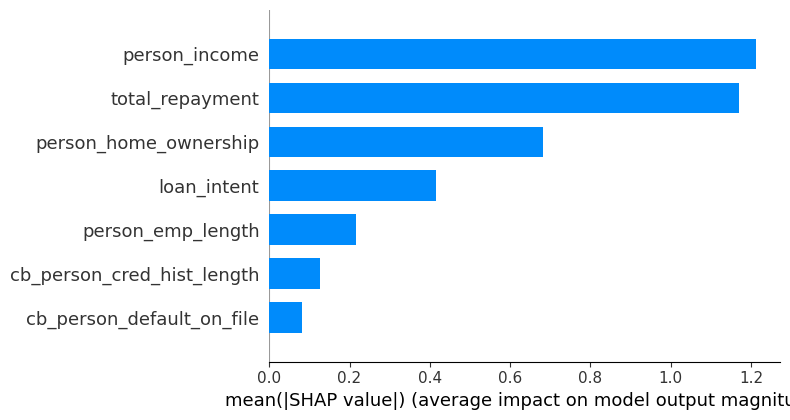

In [323]:
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar")

The data visualisation above shows the order in which each feature contributes to the model's prediction.

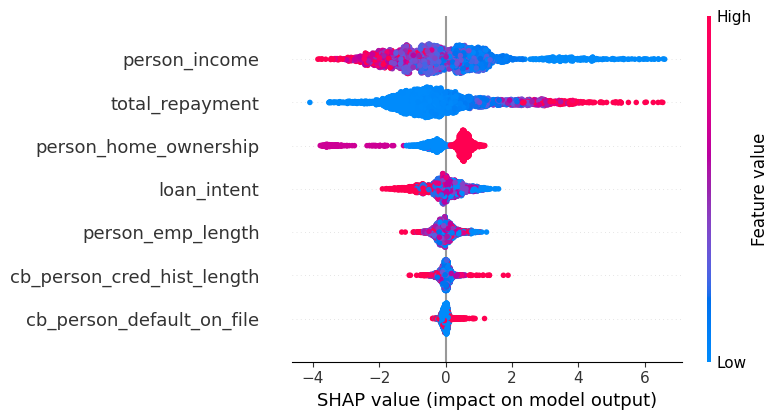

In [324]:
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test)

Encoding for 'person_home_ownership': {'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}

Encoding for 'loan_intent': {'DEBTCONSOLIDATION': 0, 'EDUCATION': 1, 'HOMEIMPROVEMENT': 2, 'MEDICAL': 3, 'PERSONAL': 4, 'VENTURE': 5}

Encoding for 'loan_grade': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

Encoding for 'loan_status': {0: 0, 1: 1}

Encoding for 'cb_person_default_on_file': {'N': 0, 'Y': 1}

The data visualisation above indicates that higher income and loan amount have the most significant impact on the model's predictions, while home ownership, loan intent, and credit history length also influence outcomes but with smaller effects

In [325]:
## save artifacts
import joblib

# scaler
joblib.dump(scaler, 'scaler.pkl')

# xgboost model
joblib.dump(model, 'credit_risk_cat_model.pkl')

['credit_risk_cat_model.pkl']

In [ ]:
# # @title Model Demo With User Input

# # map the encoded labels
# home_ownership_map = {'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}
# loan_intent_map = {'DEBTCONSOLIDATION': 0, 'EDUCATION': 1, 'HOMEIMPROVEMENT': 2, 'MEDICAL': 3, 'PERSONAL': 4, 'VENTURE': 5}
# default_map = {'N': 0, 'Y': 1}

# def get_categorical_input(prompt, options_dict):
#     """
#     For categorical columns -- to display their different options to guide user's input
#     """
#     print(f"\n{prompt}")
#     for key, value in options_dict.items():
#         print(f"{value}: {key}")
#     while True:
#         try:
#             choice = int(input("Select an option number: "))
#             if choice in options_dict.values():
#                 return choice
#             else:
#                 print("Invalid selection. Please enter a valid number.")
#         except ValueError:
#             print("Invalid input. Please enter a number.")

# print("\nEnter the details to predict credit risk:") # ask user to enter prompt

# person_income = float(input("Annual Income ($): "))
# loan_amnt = float(input("Loan Amount Requested ($): "))
# person_emp_length = float(input("Employment Length (years): "))
# cb_person_cred_hist_length = float(input("Credit History Length (years): "))

# # apply the function to the categorical columns below
# person_home_ownership = get_categorical_input("Home Ownership Options:", home_ownership_map)
# loan_intent = get_categorical_input("Loan Intent Options:", loan_intent_map)
# cb_person_default_on_file = get_categorical_input("Has Default History? (0 for N, 1 for Y):", default_map)

# # convert to df
# input_data = pd.DataFrame({
#     'person_income': [person_income],
#     'person_home_ownership': [person_home_ownership],
#     'person_emp_length': [person_emp_length],
#     'loan_intent': [loan_intent],
#     'loan_amnt': [loan_amnt],
#     'cb_person_default_on_file': [cb_person_default_on_file],
#     'cb_person_cred_hist_length': [cb_person_cred_hist_length]
# })

# input_data[numerical_cols_to_normalize] = scaler.transform(input_data[numerical_cols_to_normalize]) ## apply min max scaler

# credit_risk_prediction = model.predict_proba(input_data)

# probability_of_default = credit_risk_prediction[0][1]

# # Define a threshold for classification (e.g., 50%)
# threshold = 0.5
# risk_classification = "High-Risk" if probability_of_default >= threshold else "Low-Risk"

# # Print both probability and classification
# print(f"Your likelihood of loan default is: {round(probability_of_default * 100, 2)}%")
# print(f"Risk Classification: {risk_classification}")